# Trabajo Práctico PANDAS - Programación II - Grupo 9 - Comisión II

Integrantes:

- Lucas Demarré
- César Donnarumma 

Datasets a utilizar:

-  Climate Change: Earth Surface Temperature Data: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data
- Country Mapping - ISO, Continent, Region: https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region?select=continents2.csv
- Carbon Dioxide Levels in Atmosphere: https://www.kaggle.com/datasets/ucsandiego/carbon-dioxide
- CO2 Emission by countries Year wise (1750-2022): https://www.kaggle.com/datasets/moazzimalibhatti/co2-emission-by-countries-year-wise-17502022
- PBI (US$ a precios actuales): https://datos.bancomundial.org/indicador/NY.GDP.MKTP.CD?end=2021&start=1960&view=chart

# Interrogante a responder: ¿Existe realmente el cambio climatico?

Se intentara dar respuesta a la cuestion de mas arriba a traves de diversas preguntas mas pequeñas:

1. *Evolucion de los promedios de temperatura mundial a lo largo de los años.*
2. *Evolucion de los promedios de temperatura en cada continente a lo largo de los años.*
3. *¿Aumentó la emisión de dióxido de carbono en los continentes en los últimos 100 años?*
4. *¿Aumenta la concentracion de carbono junto con la temperatura global?*
5. *¿Existe una relación entre la cantidad de PBI de un país y sus emisiones de dióxido de carbono?*




##Librerias y csv

In [ ]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np

# Abrimos los .csv 
continents_csv = pd.read_csv('continents2.csv') # División de paises por continentes
temperaturas = pd.read_csv('GlobalTemperatures.csv') # Temperaturas globales mes a mes desde 1750 a 2015
global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv') # Temperaturas por país año a año desde 1743 a 2013
concentracion_carbono = pd.read_csv('archive.csv') 
co2_emission_country = pd.read_csv('CO2_emission_by_countries.csv', encoding = "ISO-8859-1") # Emisiones de CO2 por país año a año desde 1750 a 2020
pbi_country = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_es_csv_v2_4756459.csv', skiprows=4) # PBI de cada país por año desde 1960 a 2021

##Utilidades para las preguntas 2 y 3

In [ ]:
continents = continents_csv['region'].unique() # Cantidad de continentes
continents = np.delete(continents, -1) # Eliminamos el último elemento que es NaN

global_temp_continent = global_temp_country # Creamos una variable que sea igual al dataset original
co2_emission_continents = co2_emission_country # Creamos una variable que sea igual al dataset original

# Vamos continente a continente
for i in continents:
    countries = continents_csv[continents_csv['region'] == i]['name'].unique() # Identificamos los paises que corresponden a dicho continente
    # Reemplazamos en el .csv de las emisiones el nombre del pais por el continente al que pertenece para el punto 3
    co2_emission_continents = co2_emission_continents.replace(countries, i) 
    # Reemplazamos en el .csv de las temperaturas por pais el nombre del pais por el continente al que pertenece para el punto 2
    global_temp_continent = global_temp_continent.replace(countries, i)

## 1- Evolucion de los promedios de temperatura mundial a lo largo de los años.

Utilizaremos un .csv que contiene promedios de temperaturas a nivel global entre 1750 y 2015. Contiene una fila por mes de cada año.

Vamos a dividir el tiempo transcurrido de 1750 a 2015 en 5 periodos de 50 años + 1 periodo de 15 años
y le vamos a calcular a cada uno el promedio de temperatura. Sobre esos datos graficaremos

In [ ]:
temperaturas.head(5)

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [ ]:
# Vamos a utilizar las columna fecha y promedio de temperatura en tierra

temperaturas = temperaturas[['dt', 'LandAverageTemperature']]

In [ ]:
# Verificamos si hay valores NaN en alguna fila de la fecha

temperaturas['dt'].isnull().value_counts()

False    3192
Name: dt, dtype: int64

In [ ]:
# Verificamos si hay valores NaN en alguna fila de las temperaturas

temperaturas['LandAverageTemperature'].isnull().value_counts()

# Vemos que si

False    3180
True       12
Name: LandAverageTemperature, dtype: int64

In [ ]:
# Eliminamos las filas que tengan valores NaN en la columna 'LandAverageTemperature'

temperaturas = temperaturas.dropna(subset = ['LandAverageTemperature'])

In [ ]:
temperaturas.info()

# Ahora vemos que tenemos la misma cantidad de filas con valores que no son NaN en ambas columnas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3191
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dt                      3180 non-null   object 
 1   LandAverageTemperature  3180 non-null   float64
dtypes: float64(1), object(1)
memory usage: 74.5+ KB


In [ ]:
# Calculamos el promedio para cada periodo mencionado anteriormente

# Promedio 1750-1800 (decalustro1):
decalustro1 = temperaturas[(temperaturas['dt'] >= '1750-01-01') & (temperaturas['dt'] <= '1799-12-31')]
decalustro1 = decalustro1['LandAverageTemperature'].mean()

# Promedio 1800-1850 (decalustro2):
decalustro2 = temperaturas[(temperaturas['dt'] >= '1800-01-01') & (temperaturas['dt'] <= '1849-12-31')]
decalustro2 = decalustro2['LandAverageTemperature'].mean()

# Promedio 1850-1900 (decalustro3):
decalustro3 = temperaturas[(temperaturas['dt'] >= '1850-01-01') & (temperaturas['dt'] <= '1899-12-31')]
decalustro3 = decalustro3['LandAverageTemperature'].mean()

# Promedio 1900-1950 (decalustro4):
decalustro4 = temperaturas[(temperaturas['dt'] >= '1900-01-01') & (temperaturas['dt'] <= '1949-12-31')]
decalustro4 = decalustro4['LandAverageTemperature'].mean()

# Promedio 1950-2000 (decalustro5):
decalustro5 = temperaturas[(temperaturas['dt'] >= '1950-01-01') & (temperaturas['dt'] <= '1999-12-31')]
decalustro5 = decalustro5['LandAverageTemperature'].mean()

# Promedio 2000-2015 (decalustro6):
decalustro6 = temperaturas[(temperaturas['dt'] >= '2000-01-01') & (temperaturas['dt'] <= '2015-12-31')]
decalustro6 = decalustro6['LandAverageTemperature'].mean()

In [ ]:
# Ya tenemos calculados los promedios de cada uno de los decalustros

print(decalustro1, decalustro2, decalustro3, decalustro4, decalustro5, decalustro6)

8.20303231292517 7.889448333333333 8.128761666666666 8.479616666666667 8.795806666666666 9.54209375


In [ ]:
# Ahora creamos un nuevo dataframe y le ingresamos los datos

promedios_decalustro = pd.DataFrame(index = list(range(0,6)), columns = ['Decalustro', 'Promedio'])

promedios_decalustro.iloc[0] = ('1750-1800', decalustro1)
promedios_decalustro.iloc[1] = ('1800-1850', decalustro2)
promedios_decalustro.iloc[2] = ('1850-1900', decalustro3)
promedios_decalustro.iloc[3] = ('1900-1950', decalustro4)
promedios_decalustro.iloc[4] = ('1950-2000', decalustro5)
promedios_decalustro.iloc[5] = ('2000-2015', decalustro6)

In [ ]:
# Mostramos el nuevo DataFrame

print(promedios_decalustro.to_string())

  Decalustro  Promedio
0  1750-1800  8.203032
1  1800-1850  7.889448
2  1850-1900  8.128762
3  1900-1950  8.479617
4  1950-2000  8.795807
5  2000-2015  9.542094


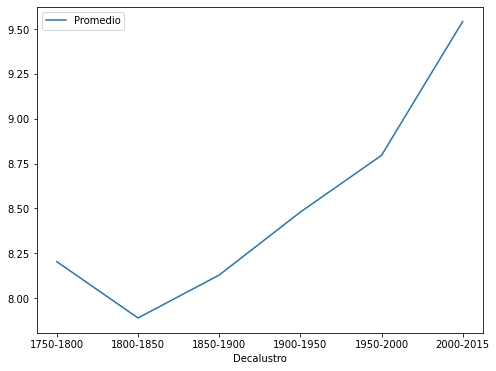

In [ ]:
# Graficamos:

promedios_decalustro.plot(x='Decalustro', y='Promedio', figsize=(8, 6))

### Si nos basamos en lo que muestra el grafico es claro que la temperatura ha ido aumentando con los años, incluso con mayor pendiente en los ultimos años

## 2- Evolucion de los promedios de temperatura en cada continente a lo largo de los años.

Para este punto utilizaremos dos .csv. Uno con las temperaturas promedio por pais a lo largo de los años y otro con datos de los diferentes paises entre los que se encuentra a que continente pertenece.

Buscaremos a que continente pertenece cada pais, y calcularemos el promedio año a año entre 1900 y 2013.

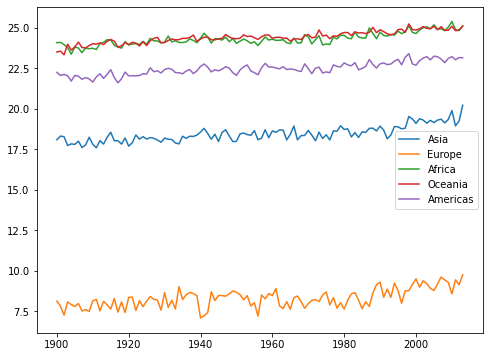

In [ ]:
# De la columna fecha nos quedamos con un array con los años sin repetir
years = global_temp_continent['dt'].apply(lambda x: x[:4]).unique() 
# Lista con sublistas vacias. Una sublista por año. En cada sublista se guardan los promedios de temperatura
# de cada uno de los continentes en dicho año.
mean_temp_year_continent = [ [] for x in range(len(years[157:])) ] 

# Una iteracion por cada año de 1900 a 2013
j = 0
for year in years[157:]: 
    # Nos quedamos con las filas donde la columna fecha pertenezca al año de la iteracion
    all_temp_year = global_temp_continent[global_temp_continent['dt'].apply(lambda x: x[:4]) == year]
    # Vamos continente a continente
    for i in continents:
    # De cada continente calculamos el promedio de temperatura en dicho año y lo guardamos en la sublista correspondiente al año
        mean_temp_year_continent[j].append(all_temp_year[all_temp_year['Country'] == i]['AverageTemperature'].mean())
    j += 1

# Creamos un data frame que tenga como indice los años que graficamos, las columnas los continentes y los datos sus promedios
df_mean_temp_year_continent = pd.DataFrame(mean_temp_year_continent, columns = continents, index = years[157:])
df_mean_temp_year_continent.plot(figsize=(8, 6)) # Lo graficamos

### Se puede ver como la temperatura fue aumentando a lo largo de los años en cada uno de los continentes

## 3- ¿Aumentó la emisión de dióxido de carbono en los continentes en los últimos 100 años? 

Para este punto utilizaremos un .csv que tiene datos de las emisiones de carbono a la atmosfera que realizo cada pais entre 1750 y 2020.

Buscaremos a continente pertenece cada pais y calcularemos el promedio de emision de carbono entre 1920 y 2020


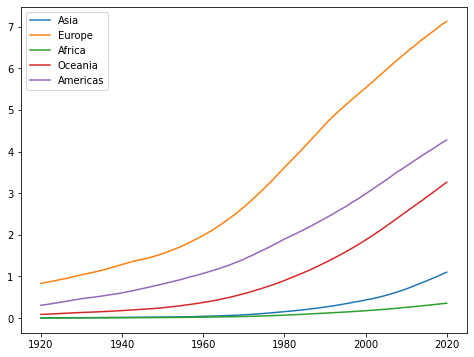

In [ ]:
# De la columna fecha nos quedamos con un array con los años sin repetir
years = co2_emission_continents['Year'].unique()
# Lista con sublistas vacias. Una sublista por año. En cada sublista se guardan los promedios de temperatura
# de cada uno de los continentes en dicho año.
mean_co2_emission_year_continent = [ [] for x in range(len(years[170:])) ] 

# Una iteracion por cada año de 1920 a 2020
j = 0
for year in years[170:]: 

    # Nos quedamos con las filas de emisiones correspondientes al año en cuestion
    all_co2_emission_year = co2_emission_continents[co2_emission_continents['Year'] == year]
    # Iteramos continente por continente
    for i in continents:
        # Calculamos el promedio de emision en dicho continente
        mean_tons_continent = all_co2_emission_year[all_co2_emission_year['Country'] == i]['CO2 emission (Tons)'].mean() / 100 # Media de toneladas de cada continente (divido 100 para bajar la escala)
        mean_population_continent = all_co2_emission_year[all_co2_emission_year['Country'] == i]['Population(2022)'].mean() # Media de población de cada continente
        mean_co2_emission_year_continent[j].append(mean_tons_continent/mean_population_continent) # Se guarda la emisión per capita (toneladas por población)
    j += 1

# Creamos un data frame que tenga como indice los años que graficamos, las columnas los continentes y los datos sus promedios
df_mean_co2_emission_year_continent = pd.DataFrame(mean_co2_emission_year_continent, columns = continents, index = years[170:])
# Lo graficamos
df_mean_co2_emission_year_continent.plot(figsize=(8, 6)) 

### En absolutamente cada uno de los continentes (algunos en menor medida) han aumentado las emisiones de carbono a la atmosfera a lo largo de los años

## 4- ¿Aumenta la concentracion de carbono junto con la temperatura global?

Para esta parte utilizaremos un .csv que tiene datos de las concentraciones de carbono en la atmosfera a lo largo de los años y el mismo .csv anterior de las temperaturas promedio a nivel global

Vamos a dividir el periodo de 1970-2015 en 5 periodos (4 de una decada y 1 de 5 años) y vamos a calcular tanto el promedio de concentracion de carbono en la atmosfera como el promedio de temperatura durante ese periodo

----------------------------------------------------

*(Tener en cuenta que previo a ejecutar esta parte debe haberse ejecutado la parte 1 ya que la limpieza de los datos de temperatura fue hecha ahi, si se ejecuta esto sin lo anterior se utilizaran los datos sucios de la tepmeratura)*

----------------------------------------------------

In [ ]:
# 1- Limpiamos un poco el dataset de las concentraciones

concentracion_carbono = concentracion_carbono[['Year', 'Carbon Dioxide (ppm)']]

In [ ]:
concentracion_carbono.info()

# Vemos que hay 17 filas NaN en 'Carbon Dioxide (ppm)'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  720 non-null    int64  
 1   Carbon Dioxide (ppm)  703 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.4 KB


In [ ]:
# Eliminamos las filas que continen NaN en las concentraciones

concentracion_carbono = concentracion_carbono.dropna(subset = ['Carbon Dioxide (ppm)'])

In [ ]:
# Calculamos los datos de los distintos periodos

concentracion_periodo1 = concentracion_carbono[(concentracion_carbono['Year']>=1970) & (concentracion_carbono['Year']<1980)]
concentracion_periodo1 = concentracion_periodo1['Carbon Dioxide (ppm)'].mean()
concentracion_periodo2 = concentracion_carbono[(concentracion_carbono['Year']>=1980) & (concentracion_carbono['Year']<1990)]
concentracion_periodo2 = concentracion_periodo2['Carbon Dioxide (ppm)'].mean()
concentracion_periodo3 = concentracion_carbono[(concentracion_carbono['Year']>=1990) & (concentracion_carbono['Year']<2000)]
concentracion_periodo3 = concentracion_periodo3['Carbon Dioxide (ppm)'].mean()
concentracion_periodo4 = concentracion_carbono[(concentracion_carbono['Year']>=2000) & (concentracion_carbono['Year']<2010)]
concentracion_periodo4 = concentracion_periodo4['Carbon Dioxide (ppm)'].mean()
concentracion_periodo5 = concentracion_carbono[(concentracion_carbono['Year']>=2010) & (concentracion_carbono['Year']<2015)]
concentracion_periodo5 = concentracion_periodo5['Carbon Dioxide (ppm)'].mean()

temperatura_periodo1 = temperaturas[(temperaturas['dt'] >= '1970-01-01') & (temperaturas['dt'] <= '1979-12-31')]
temperatura_periodo1 = temperatura_periodo1['LandAverageTemperature'].mean()
temperatura_periodo2 = temperaturas[(temperaturas['dt'] >= '1980-01-01') & (temperaturas['dt'] <= '1989-12-31')]
temperatura_periodo2 = temperatura_periodo2['LandAverageTemperature'].mean()
temperatura_periodo3 = temperaturas[(temperaturas['dt'] >= '1990-01-01') & (temperaturas['dt'] <= '1999-12-31')]
temperatura_periodo3 = temperatura_periodo3['LandAverageTemperature'].mean()
temperatura_periodo4 = temperaturas[(temperaturas['dt'] >= '2000-01-01') & (temperaturas['dt'] <= '2009-12-31')]
temperatura_periodo4 = temperatura_periodo4['LandAverageTemperature'].mean()
temperatura_periodo5 = temperaturas[(temperaturas['dt'] >= '2010-01-01') & (temperaturas['dt'] <= '2014-12-31')]
temperatura_periodo5 = temperatura_periodo5['LandAverageTemperature'].mean()

In [ ]:
# Metemos la informacion calculada en un DataFrame:

concentracion_temperatura = pd.DataFrame(index = list(range(0,5)), columns = ['Periodo', 'Promedio concentracion Carbono', 'Promedio temperatura'])

concentracion_temperatura.iloc[0] = ('Decada 70', concentracion_periodo1, temperatura_periodo1)
concentracion_temperatura.iloc[1] = ('Decada 80', concentracion_periodo2, temperatura_periodo2)
concentracion_temperatura.iloc[2] = ('Decada 90', concentracion_periodo3, temperatura_periodo3)
concentracion_temperatura.iloc[3] = ('Decada 00', concentracion_periodo4, temperatura_periodo4)
concentracion_temperatura.iloc[4] = ('Lustro 10-15', concentracion_periodo5, temperatura_periodo5)

In [ ]:
# Vemos el nuevo DataFrame

concentracion_temperatura

,Periodo,Promedio concentracion Carbono,Promedio temperatura
0,Decada 70,330.89425,8.6584
1,Decada 80,345.333583,8.911492
2,Decada 90,360.430333,9.155183
3,Decada 00,378.441,9.493892
4,Lustro 10-15,394.12,9.580717


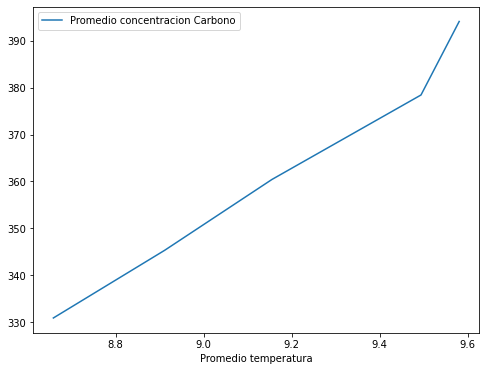

In [ ]:
# Graficamos:

concentracion_temperatura.plot(y='Promedio concentracion Carbono', x='Promedio temperatura', figsize=(8, 6))

### Ahora podemos ver que ha medida que han ido aumentando las temperaturas tambien lo han hecho las concentraciones de carbono en la atmosfera

##5- ¿Existe una relación entre la cantidad de PBI de un país y sus emisiones de dióxido de carbono?
Usaremos dos .csv, el primero contiene PBI de distintos paises a lo largo de los años y el segun contiene las emisiones de dioxido de carbono de distintos paises a lo largo de los años

Consideraciones:

- Responderemos la pregunta teniendo en cuenta PBI y emisiones del 2020.

- Hacerlo con todos los paises seria demasiado trabajo ya que los nombres los datasets no coinciden, por lo tanto vamos a elegir 15 paises. 5 de PBI alto, 5 de PBI medio y 5 de PBI bajo.

In [ ]:
# 1- Primero limpiamos los datos del .csv de los PBI

# Nos quedamos con las columnas que nos importan (solo analizaremos el año 2020)
pbi_paises_2020 = pbi_country[['Country Name', '2020']]

In [ ]:
# Aqui vemos que hay filas NaN en ambas columnas

pbi_paises_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  264 non-null    object 
 1   2020          251 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [ ]:
# Eliminamos las filas que contengan NaN en alguna de las columnas
pbi_paises_2020 = pbi_paises_2020.dropna()

In [ ]:
# Ahora podemos ver que la cantidad de elementos coincide con el conteo de elementos no null en cada columna
pbi_paises_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 265
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  249 non-null    object 
 1   2020          249 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [ ]:
# Seteamos como indice la columna con el nombre de pais
pbi_paises_2020 = pbi_paises_2020.set_index('Country Name')

In [ ]:
# Dividimos todos los pbi por 1millon, los numeros ahora representan millones y los casteamos a int para
# sacar los decimales
pbi_paises_2020 = pbi_paises_2020/1000000

In [ ]:
pbi_paises_2020 = pbi_paises_2020.astype(int)

In [ ]:
# Ordenamos los paises por PBI ascendente y elegimos :
pbi_paises_2020.sort_values('2020')

# Ingresos altos: Estados unidos, China, Japon, Alemania, India
# Ingresos medios: Grecia, Peru, Chile, Dinamarca, Argentina
# Ingresos bajos: Jamaica, Islandia, Nicaragua, Senegal, Afganistan

,2020
Country Name,
Tuvalu,55
Nauru,114
Kiribati,180
Islas Marshall,244
Palau,257
...,...
BIRF y la AIF,32364941
posterior al dividendo demográfico,49529282
Miembros OCDE,52333093


In [ ]:
# Nos quedamos solo con los PBI de los paises que nos interesan
pbi_paises_2020 = pbi_paises_2020.loc[['Estados Unidos', 'China', 'Japón', 'Alemania', 'India', 'Grecia', 'Perú', 'Chile', 'Dinamarca', 'Argentina', 'Jamaica', 'Islandia', 'Nicaragua', 'Senegal', 'Afganistán']]

In [ ]:
pbi_paises_2020

,2020
Country Name,
Estados Unidos,20893743
China,14687673
Japón,5040107
Alemania,3846413
India,2667687
Grecia,188835
Perú,201705
Chile,252727
Dinamarca,356084


In [ ]:
# 2- Ahora limpiamos los datos de las emisiones

# Nos quedamos con las columnas que nos interesan
emisiones_paises_2020 = co2_emission_country[['Country', 'Year', 'CO2 emission (Tons)']]

In [ ]:
# Solo nos interesan las filas cuyo año sea 2020 y quedarnos solamente con las columnas nombre de paises y emisiones
emisiones_paises_2020 = emisiones_paises_2020[emisiones_paises_2020['Year']==2020][['Country', 'CO2 emission (Tons)']]

In [ ]:
# Vemos que no hay nulos en ninguna fila
emisiones_paises_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 270 to 59619
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              220 non-null    object 
 1   CO2 emission (Tons)  220 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.2+ KB


In [ ]:
# Seteamos como indice el nombre del pais

emisiones_paises_2020.set_index('Country', inplace = True)

In [ ]:
# Nos quedamos solo con los datos que vamos a utilizar de este Data Frame

emisiones_paises_2020 = emisiones_paises_2020.loc[['United States', 'China', 'Japan', 'Germany', 'India', 'Greece', 'Peru', 'Chile', 'Denmark', 'Argentina', 'Jamaica', 'Iceland', 'Nicaragua', 'Senegal', 'Afghanistan']]

In [ ]:
# Ahora vamos las toneladas de carbono van a ser millones de toneladas

emisiones_paises_2020 = emisiones_paises_2020/1000000

In [ ]:
emisiones_paises_2020

,CO2 emission (Tons)
Country,
United States,417000.000000
China,236000.000000
Japan,65625.166916
Germany,92635.615097
India,54416.488997
Greece,4073.671400
Peru,1941.850252
Chile,2903.063180
Denmark,4082.633409


In [ ]:
# 3- Preparamos el nuevo DataFrame

paises = pbi_paises_2020.index.tolist() # Indices ordenados
emisiones_mill_toneladas = emisiones_paises_2020['CO2 emission (Tons)'].tolist() # Valores columna emisiones ordenados
pbi_mill_dolares = pbi_paises_2020['2020'].tolist() # Valores PBI ordenado

pbi_emisiones = pd.DataFrame(index=paises, columns=['PBI(Mill U$D)', 'Emisiones(Mill Toneladas)'])
pbi_emisiones['PBI(Mill U$D)'] = pbi_mill_dolares
pbi_emisiones['Emisiones(Mill Toneladas)'] = emisiones_mill_toneladas

In [ ]:
pbi_emisiones

,PBI(Mill U$D),Emisiones(Mill Toneladas)
Estados Unidos,20893743,417000.000000
China,14687673,236000.000000
Japón,5040107,65625.166916
Alemania,3846413,92635.615097
India,2667687,54416.488997
Grecia,188835,4073.671400
Perú,201705,1941.850252
Chile,252727,2903.063180
Dinamarca,356084,4082.633409
Argentina,389591,8431.213004


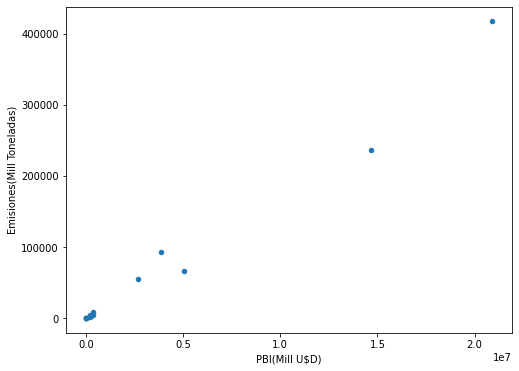

In [ ]:
pbi_emisiones.plot.scatter(x='PBI(Mill U$D)', y='Emisiones(Mill Toneladas)', figsize=(8, 6))

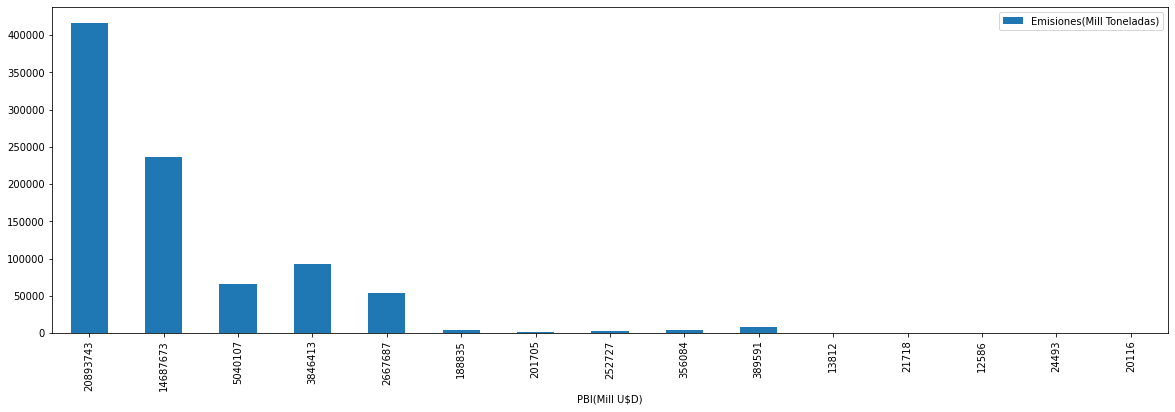

In [ ]:
pbi_emisiones.plot.bar(x='PBI(Mill U$D)', y='Emisiones(Mill Toneladas)',figsize=(20, 6))

### Aparentemente segun nuestros datos los paises de mayor PBI son los que mas carbono emiten